In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# 1. Replace zero values in key features with column median
key_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for col in key_features:
    median = df.loc[df[col] != 0, col].median()
    df.loc[df[col] == 0, col] = median

# 2. Replace the first row’s glucose value with the maximum glucose
df.loc[0, 'Glucose'] = df['Glucose'].max()

# 3. For records with the lowest age, replace glucose values with the minimum
min_age = df['Age'].min()
df.loc[df['Age'] == min_age, 'Glucose'] = df['Glucose'].min()

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,199,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,44,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  116.294271      72.386719      29.108073  140.671875   
std    

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred_cont = model.predict(X_test)
y_pred = np.rint(y_pred_cont).astype(int)
y_pred = np.clip(y_pred, 0, 1)


In [ ]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)
print("Confusion Matrix:\n", cm)


Accuracy: 0.7597402597402597
Precision: 0.68
Recall: 0.6181818181818182
F1-score: 0.6476190476190476
Confusion Matrix:
 [[83 16]
 [21 34]]


Accuracy: 0.7532


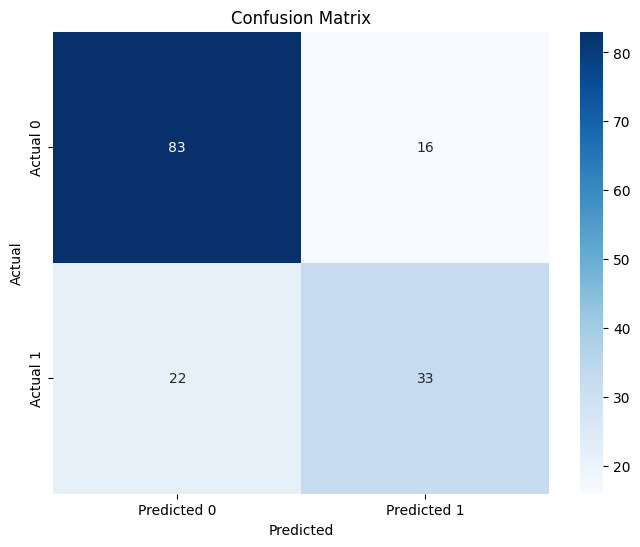


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81        99
           1       0.67      0.60      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
# 1. Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.4f}")

# 2. Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# 3. Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 4. Print a classification report
class_report = classification_report(y_test, y_pred_binary)
print("\nClassification Report:")
print(class_report)